In [54]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
py.init_notebook_mode(connected=True)
%matplotlib inline

C:\Users\hp\Anaconda3\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

Using TensorFlow backend.


In [55]:
import os 
os.chdir ('F:\Bitcoin and Blockchain\kaggle\Cryptocurrency Historical Prices')

In [56]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
#from subprocess import check_output
#print(check_output(["ls", "F:\Bitcoin and Blockchain\kaggle\Cryptocurrency Historical Prices"]).decode("utf8"))

In [57]:
import os
def fn():       # 1.Get file names from directory
    file_list=os.listdir(r"F:\Bitcoin and Blockchain\kaggle\Cryptocurrency Historical Prices")
    print (file_list)

 #2.To rename files
fn()

['bitcoin_cash_price.csv', 'bitcoin_dataset.csv', 'bitcoin_price.csv', 'bitconnect_price.csv', 'dash_price.csv', 'ethereum_classic_price.csv', 'ethereum_dataset.csv', 'ethereum_price.csv', 'iota_price.csv', 'litecoin_price.csv', 'monero_price.csv', 'nem_price.csv', 'neo_price.csv', 'numeraire_price.csv', 'omisego_price.csv', 'qtum_price.csv', 'ripple_price.csv', 'stratis_price.csv', 'waves_price.csv']


In [81]:
import pandas as pd
cashprice = pd.read_csv("bitcoin_cash_price.csv")
df = pd.read_csv("bitcoin_dataset.csv",parse_dates=['Date'])
conprice = pd.read_csv("bitconnect_price.csv",parse_dates=['Date'])
dashprice = pd.read_csv("dash_price.csv")
ethereumc_price = pd.read_csv("ethereum_classic_price.csv")
moneroprice = pd.read_csv("monero_price.csv")
neoprice = pd.read_csv("neo_price.csv")

In [82]:
conprice.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-02-20,3.97,4.16,3.44,3.52,"157,912","36,680,600"
1,2018-02-19,3.69,4.15,3.62,3.95,"108,297","34,058,900"
2,2018-02-18,4.34,4.34,3.66,3.70,"150,823","40,037,400"
3,2018-02-17,4.08,4.38,4.01,4.31,"185,105","37,708,600"
4,2018-02-16,4.06,4.19,3.87,4.13,"149,639","37,459,600"


In [83]:
conprice.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
392,2017-01-24,0.152959,0.671748,0.134264,0.142972,"33,237","766,670"
393,2017-01-23,0.128182,0.156983,0.126968,0.154695,"6,921","641,762"
394,2017-01-22,0.174903,0.178088,0.123697,0.128067,526,"874,666"
395,2017-01-21,0.145710,0.236289,0.144554,0.174829,"12,872","727,753"
396,2017-01-20,0.162671,0.166808,0.145625,0.145625,"5,978","812,236"


In [84]:
conprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 7 columns):
Date          397 non-null datetime64[ns]
Open          397 non-null float64
High          397 non-null float64
Low           397 non-null float64
Close         397 non-null float64
Volume        397 non-null object
Market Cap    397 non-null object
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 21.8+ KB


In [92]:
btc_trace = go.Scatter(x=conprice.index, y=conprice['Market Cap'], name= 'Price')
py.iplot([btc_trace])

In [86]:
import matplotlib.dates as mdates
conprice['Date_mpl'] = conprice['Date'].apply(lambda x: mdates.date2num(x))
conprice['Year'] = conprice["Date"].apply(lambda x: x.year)
conprice['Month'] = conprice['Date'].apply(lambda x: x.month)
conprice['Day'] = conprice['Date'].apply(lambda x: x.day)

In [87]:
conprice.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Date_mpl,Year,Month,Day
0,2018-02-20,3.97,4.16,3.44,3.52,"157,912","36,680,600",736745.0,2018,2,20
1,2018-02-19,3.69,4.15,3.62,3.95,"108,297","34,058,900",736744.0,2018,2,19
2,2018-02-18,4.34,4.34,3.66,3.70,"150,823","40,037,400",736743.0,2018,2,18
3,2018-02-17,4.08,4.38,4.01,4.31,"185,105","37,708,600",736742.0,2018,2,17
4,2018-02-16,4.06,4.19,3.87,4.13,"149,639","37,459,600",736741.0,2018,2,16


In [88]:
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2010-02-23,0.0,2110700.0,0.0,0.0,0.0,0.000216,0.0,1.0,0.0,0.000032,2.527738,0.0,0.0,25100.000000,0.0,252.0,252.0,42613.0,252.0,252.0,12600.0,50.0,0.0
1,2010-02-24,0.0,2120200.0,0.0,0.0,0.0,0.000282,0.0,1.0,0.0,0.000036,3.781179,0.0,0.0,179.245283,0.0,195.0,196.0,42809.0,196.0,196.0,14800.0,5300.0,0.0
2,2010-02-25,0.0,2127600.0,0.0,0.0,0.0,0.000227,0.0,1.0,0.0,0.000028,3.781179,0.0,0.0,1057.142857,0.0,150.0,150.0,42959.0,150.0,150.0,8100.0,700.0,0.0
3,2010-02-26,0.0,2136100.0,0.0,0.0,0.0,0.000319,0.0,1.0,0.0,0.000032,3.781179,0.0,0.0,64.582059,0.0,176.0,176.0,43135.0,176.0,176.0,29349.0,13162.0,0.0
4,2010-02-27,0.0,2144750.0,0.0,0.0,0.0,0.000223,0.0,1.0,0.0,0.000033,3.781179,0.0,0.0,1922.222222,0.0,176.0,176.0,43311.0,176.0,176.0,9101.0,450.0,0.0


In [89]:
df['Year'] = df['Date'].apply(lambda x: x.year)
df['Month'] = df['Date'].apply(lambda x: x.month)
df.head(3)

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd,Year,Month
0,2010-02-23,0.0,2110700.0,0.0,0.0,0.0,0.000216,0.0,1.0,0.0,0.000032,2.527738,0.0,0.0,25100.000000,0.0,252.0,252.0,42613.0,252.0,252.0,12600.0,50.0,0.0,2010,2
1,2010-02-24,0.0,2120200.0,0.0,0.0,0.0,0.000282,0.0,1.0,0.0,0.000036,3.781179,0.0,0.0,179.245283,0.0,195.0,196.0,42809.0,196.0,196.0,14800.0,5300.0,0.0,2010,2
2,2010-02-25,0.0,2127600.0,0.0,0.0,0.0,0.000227,0.0,1.0,0.0,0.000028,3.781179,0.0,0.0,1057.142857,0.0,150.0,150.0,42959.0,150.0,150.0,8100.0,700.0,0.0,2010,2


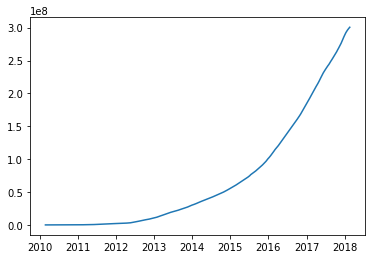

In [90]:
plt.plot(df['Date'], df['btc_n_transactions_total'])
plt.show()

In [91]:
btc_trace = go.Scatter(x=df.index,y=df['btc_n_transactions_total'],name = 'price')
#btc_trace = go.Scatter(x=data.index, y=data['Weighted Price'], name= 'Price')
py.iplot([btc_trace])